# EXERCISE

In [180]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [181]:
# loading into python
loan = pd.read_csv('loan_dataset.csv')

In [182]:
# display first 5 rows 
loan.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [183]:
# Print information about the dataframe 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  int64  
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  float64
 10  debt_to_income_ratio      116058 non-null  float64
 11  borrower_credit_score     116058 non-null  float64
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  f

### CHECKING FOR DUPLICATES

In [184]:
# display the rows having duplicates 
loan[loan.duplicated()]

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13


In [185]:
# count of null values
loan.isna().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [186]:
# number of rows and columns of the dataframe 
loan.shape

(116058, 29)

In [187]:
# count of unique values in loan_id column
loan['loan_id'].nunique()

116058

~ 116058 unique values present in loan_id column which does not contribute much to the machine learning model

In [188]:
# dropping loan_id column from the dataframe
loan.drop('loan_id', axis =1, inplace=True)

In [189]:
# display summary statistics of all numerical columns
loan.describe() 

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


<AxesSubplot:xlabel='m13', ylabel='count'>

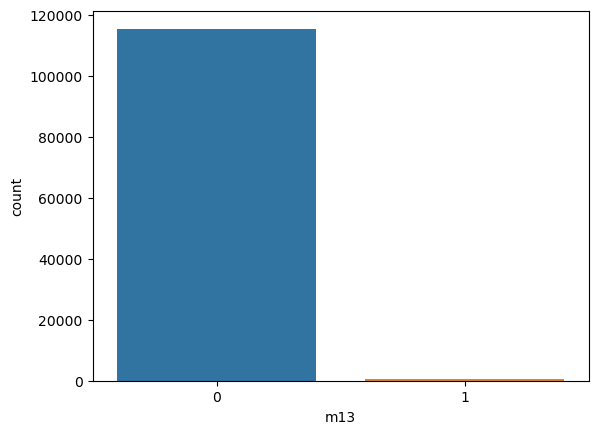

In [190]:
# count of people who are repaying the loan in 13th month
sns.countplot(x='m13', data=loan)

In [191]:
# filtering out categorical features
categorical_feature = [feature for feature in loan.columns if loan[feature].dtypes == 'O']
categorical_feature

['source',
 'financial_institution',
 'origination_date',
 'first_payment_date',
 'loan_purpose']

In [192]:
# filtering out numerical features and displaying it
numerical_feature = [feature for feature in loan.columns if loan[feature].dtypes != 'O']
numerical_feature

['interest_rate',
 'unpaid_principal_bal',
 'loan_term',
 'loan_to_value',
 'number_of_borrowers',
 'debt_to_income_ratio',
 'borrower_credit_score',
 'insurance_percent',
 'co-borrower_credit_score',
 'insurance_type',
 'm1',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'm7',
 'm8',
 'm9',
 'm10',
 'm11',
 'm12',
 'm13']

In [193]:
# displaying unique values in numerical features and displaying it
for i in numerical_feature:
    print(f"{i} column \n")    
    nuni = loan[i].nunique()
    print(f"Count of unique values = {nuni}\n")    
    uni = loan[i].unique()
    print(f"Unique values = {uni}\n\n\n")    

interest_rate column 

Count of unique values = 923

Unique values = [4.25  4.875 3.25  4.75  4.375 4.    4.5   4.125 3.75  4.625 5.125 3.375
 3.99  4.312 3.875 5.5   3.5   3.33  5.    3.625 5.25  2.875 3.46  3.98
 3.928 5.375 3.95  4.05  3.125 3.    5.75  3.74  3.709 4.3   4.99  4.225
 5.875 4.28  4.58  4.9   4.49  4.1   3.856 4.54  3.77  3.504 3.958 4.06
 3.87  3.1   3.94  4.124 4.015 2.95  3.167 3.835 3.938 3.503 3.438 3.49
 3.24  4.19  3.902 4.46  3.289 3.978 4.03  4.358 2.99  3.795 3.074 3.91
 2.975 3.71  2.75  4.08  4.876 3.185 3.35  4.2   4.864 3.613 3.865 4.917
 3.908 3.337 3.92  2.625 3.43  3.65  4.17  3.85  3.985 2.775 3.79  3.67
 3.947 4.048 2.8   3.17  4.21  4.849 3.83  4.521 3.852 3.943 3.999 3.972
 3.18  3.476 4.986 3.42  3.2   4.119 5.625 3.175 3.41  3.145 3.837 3.331
 3.7   3.983 4.115 4.499 3.16  3.45  3.319 3.93  3.8   3.925 3.73  4.368
 3.13  3.9   3.05  3.54  3.08  4.29  3.58  3.81  3.31  4.089 3.97  3.746
 4.217 3.825 3.4   3.392 3.321 3.976 3.47  4.33  3.184 4.09 

Unique values = [0 1 2 3 4]



m3 column 

Count of unique values = 6

Unique values = [0 2 1 3 4 5]



m4 column 

Count of unique values = 7

Unique values = [0 3 1 2 4 5 6]



m5 column 

Count of unique values = 8

Unique values = [0 4 1 3 2 5 6 7]



m6 column 

Count of unique values = 9

Unique values = [0 5 1 2 4 3 6 7 8]



m7 column 

Count of unique values = 10

Unique values = [1 0 6 3 5 2 4 7 8 9]



m8 column 

Count of unique values = 10

Unique values = [ 0  7  1  4  6  2  5  3  9 10]



m9 column 

Count of unique values = 11

Unique values = [ 0  1  8  5  7  3  6  2 10  4 11]



m10 column 

Count of unique values = 12

Unique values = [ 0  1  9  2  6  8  4  3  7 11  5 12]



m11 column 

Count of unique values = 13

Unique values = [ 0  1 10  2  7  9  5  3  8  4  6 11 13]



m12 column 

Count of unique values = 13

Unique values = [ 0  1 11  2  8  3 10  6  9  5  4  7 14]



m13 column 

Count of unique values = 2

Unique values = [1 0]





In [194]:
# filter out the date features alone
date_feature = [feature for feature in categorical_feature if 'date' in feature]
date_feature

['origination_date', 'first_payment_date']

In [195]:
# filtering discrete numerical features
discrete_numerical_feature = [feature for feature in numerical_feature if len(loan[feature].unique()) < 200]
discrete_numerical_feature

['loan_term',
 'loan_to_value',
 'number_of_borrowers',
 'debt_to_income_ratio',
 'insurance_percent',
 'insurance_type',
 'm1',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'm7',
 'm8',
 'm9',
 'm10',
 'm11',
 'm12',
 'm13']

In [196]:
# filtering out continuous numerical features
continuous_numerical_feature = [feature for feature in numerical_feature if feature not in discrete_numerical_feature]
continuous_numerical_feature

['interest_rate',
 'unpaid_principal_bal',
 'borrower_credit_score',
 'co-borrower_credit_score']

##### Outliers in continuous numerical features

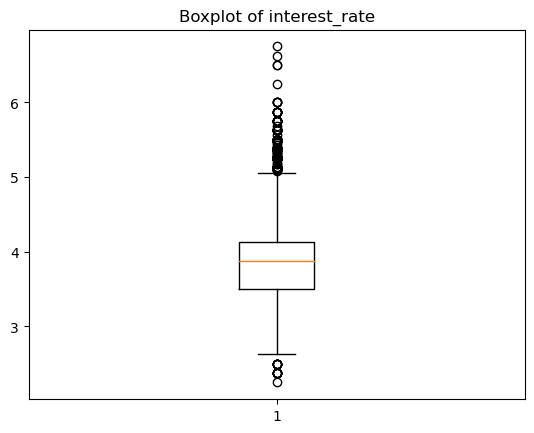

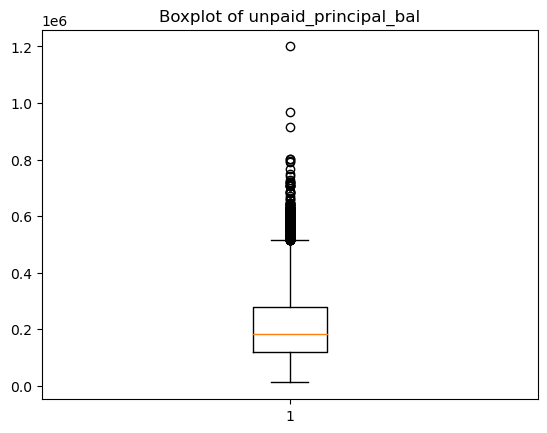

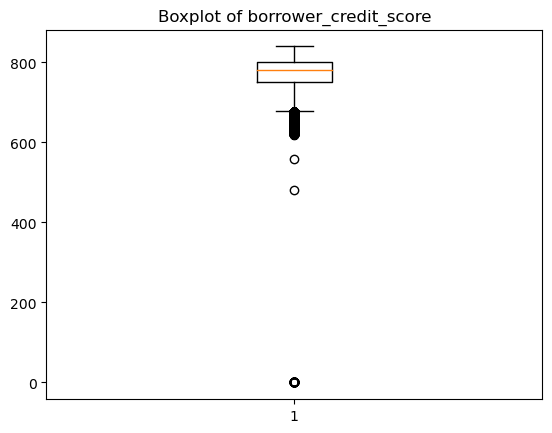

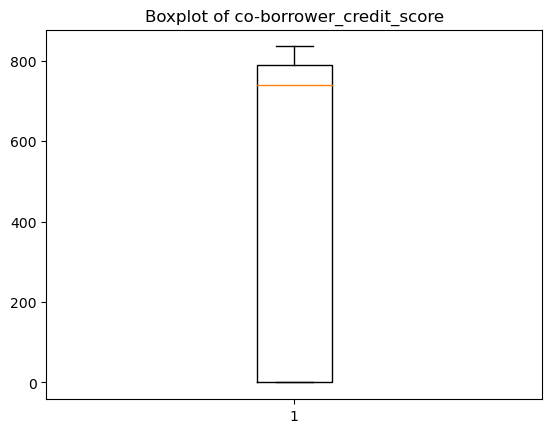

In [197]:
# boxplot of outliers in continuous numerical feature
for i in continuous_numerical_feature:
    
    # boxplot of columns
    plt.boxplot(loan[i])
    text = "Boxplot of"
    
    # display title
    plt.title(text+" "+i)
    plt.show()

~ from the above boxplots, outliers are found in interest_rate, unpaid_principal_bal, borrower_credit_score columns

In [198]:
# display outliers present in continuous numerical feature
for i in continuous_numerical_feature:
    
    # display column name
    print(f"{i} column\n")
    
    # display first quartile
    Q1_i = np.percentile(loan[i], 25, interpolation='midpoint')
    print(f"First Quartile = {Q1_i}")
    
    # display second quartile
    Q2_i = np.percentile(loan[i], 50, interpolation='midpoint')
    print(f"Second Quartile = {Q2_i}")
    
    # display third quartile
    Q3_i = np.percentile(loan[i], 75, interpolation='midpoint')
    print(f"Third Quartile = {Q3_i}")
    
    # display interquartile range
    IQR_i =  Q3_i-Q1_i
    print(f"IQR = {IQR_i}")
    
    # display lower whisker
    low_i = Q1_i-1.5*IQR_i
    print(f"lower whisker = {low_i}")
    
    # display upper whisker
    up_i = Q3_i+1.5*IQR_i
    print(f"upper whisker = {up_i}\n")
    
    # display outliers in columns
    outlier_i = [] 
    for x_i in loan[i]:
        if((x_i > up_i) or (x_i < low_i)):
            outlier_i.append(x_i) 
    print(f"Outliers = {outlier_i}\n\n\n")
        

interest_rate column

First Quartile = 3.5
Second Quartile = 3.875
Third Quartile = 4.125
IQR = 0.625
lower whisker = 2.5625
upper whisker = 5.0625

Outliers = [5.125, 5.5, 5.125, 5.25, 5.125, 5.25, 5.25, 5.375, 5.125, 5.25, 5.75, 5.5, 5.375, 5.375, 5.5, 5.5, 5.125, 5.875, 5.5, 5.125, 5.125, 5.25, 5.375, 5.125, 5.375, 5.125, 5.125, 5.5, 5.125, 5.375, 5.375, 5.75, 5.5, 5.125, 5.5, 5.375, 5.25, 5.375, 5.375, 5.25, 5.625, 5.125, 5.125, 5.375, 5.25, 5.125, 5.125, 5.5, 5.375, 5.375, 5.75, 5.375, 5.125, 5.5, 5.125, 5.25, 5.25, 5.75, 5.125, 5.75, 5.375, 5.375, 5.125, 6.25, 5.5, 5.125, 5.375, 5.25, 5.125, 5.375, 5.25, 5.125, 5.5, 5.375, 5.25, 5.375, 5.125, 5.375, 5.25, 5.375, 5.25, 5.125, 5.25, 5.25, 5.625, 5.375, 5.25, 5.25, 5.125, 5.125, 5.375, 5.25, 5.25, 5.125, 5.69, 5.125, 5.5, 5.125, 5.375, 5.125, 5.25, 5.125, 5.125, 5.375, 5.125, 5.125, 5.25, 5.125, 5.125, 5.25, 5.25, 2.375, 5.125, 5.25, 5.375, 5.125, 5.375, 5.125, 5.375, 5.125, 5.125, 5.25, 5.375, 5.375, 5.75, 5.25, 5.25, 5.25, 5.125, 

First Quartile = 751.0
Second Quartile = 782.0
Third Quartile = 800.0
IQR = 49.0
lower whisker = 677.5
upper whisker = 873.5

Outliers = [633.0, 675.0, 652.0, 669.0, 640.0, 621.0, 667.0, 669.0, 630.0, 661.0, 650.0, 667.0, 627.0, 648.0, 641.0, 650.0, 626.0, 675.0, 672.0, 654.0, 640.0, 669.0, 669.0, 641.0, 668.0, 672.0, 635.0, 677.0, 665.0, 639.0, 637.0, 674.0, 676.0, 667.0, 650.0, 659.0, 673.0, 643.0, 645.0, 640.0, 666.0, 672.0, 663.0, 657.0, 658.0, 660.0, 637.0, 621.0, 660.0, 663.0, 645.0, 664.0, 646.0, 663.0, 655.0, 643.0, 655.0, 657.0, 669.0, 650.0, 670.0, 658.0, 626.0, 621.0, 629.0, 633.0, 654.0, 624.0, 666.0, 673.0, 672.0, 665.0, 668.0, 669.0, 670.0, 670.0, 638.0, 632.0, 649.0, 649.0, 653.0, 672.0, 644.0, 648.0, 649.0, 660.0, 671.0, 656.0, 650.0, 649.0, 652.0, 660.0, 673.0, 645.0, 634.0, 662.0, 643.0, 662.0, 652.0, 651.0, 660.0, 635.0, 655.0, 674.0, 651.0, 636.0, 664.0, 656.0, 660.0, 643.0, 639.0, 649.0, 661.0, 635.0, 627.0, 661.0, 625.0, 644.0, 635.0, 654.0, 647.0, 656.0, 641.0, 6

### CORRELATION

In [199]:
# Correlation performed on numerical features
P = loan[numerical_feature]

In [200]:
# creating an instance for correlation
corrmatrix = P.corr()

# displaying the values of 'corrmatrix'
corrmatrix

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
interest_rate,1.000000,-0.002854,0.720734,0.273379,-0.128075,0.181988,-0.210468,0.143116,-0.138013,0.055883,...,0.030543,0.035726,0.034311,0.032133,0.035393,0.035841,0.037994,0.037051,0.039708,0.054298
unpaid_principal_bal,-0.002854,1.000000,0.192168,0.062447,0.130565,0.073415,0.052061,0.010926,0.132632,0.015985,...,-0.010344,-0.011461,-0.007814,-0.008912,-0.009228,-0.008983,-0.005866,-0.006412,-0.008254,-0.017120
loan_term,0.720734,0.192168,1.000000,0.292565,-0.107341,0.137852,-0.072021,0.190762,-0.110268,0.028731,...,0.011688,0.013645,0.011622,0.011406,0.012954,0.014031,0.015510,0.014814,0.015773,0.023502
loan_to_value,0.273379,0.062447,0.292565,1.000000,-0.100898,0.126993,-0.142574,0.490128,-0.109546,0.075813,...,0.009826,0.006928,0.010560,0.010243,0.009938,0.008775,0.011103,0.010856,0.010811,0.016357
number_of_borrowers,-0.128075,0.130565,-0.107341,-0.100898,1.000000,-0.134395,0.120120,-0.058976,0.996498,-0.015769,...,-0.023442,-0.024665,-0.022337,-0.023716,-0.027472,-0.028033,-0.025946,-0.027608,-0.029661,-0.039979
debt_to_income_ratio,0.181988,0.073415,0.137852,0.126993,-0.134395,1.000000,-0.184406,0.066946,-0.145145,0.016558,...,0.015444,0.020784,0.021242,0.021904,0.025402,0.022836,0.024310,0.025467,0.024697,0.038033
borrower_credit_score,-0.210468,0.052061,-0.072021,-0.142574,0.120120,-0.184406,1.000000,-0.062849,0.153952,-0.004608,...,-0.057269,-0.066448,-0.063116,-0.064656,-0.063057,-0.062565,-0.062256,-0.061407,-0.063148,-0.094215
insurance_percent,0.143116,0.010926,0.190762,0.490128,-0.058976,0.066946,-0.062849,1.000000,-0.063370,0.145292,...,-0.000735,-0.003598,-0.001315,-0.003097,-0.001997,-0.002225,-0.000652,-0.000102,0.000598,0.005722
co-borrower_credit_score,-0.138013,0.132632,-0.110268,-0.109546,0.996498,-0.145145,0.153952,-0.063370,1.000000,-0.016058,...,-0.024716,-0.026393,-0.024080,-0.025423,-0.028770,-0.029218,-0.027354,-0.028930,-0.030878,-0.042651
insurance_type,0.055883,0.015985,0.028731,0.075813,-0.015769,0.016558,-0.004608,0.145292,-0.016058,1.000000,...,0.000428,0.003046,0.002948,-0.002356,0.001572,-0.001210,0.002546,-0.000638,-0.000890,0.005999


In [201]:
# high and least correlated columns with respect to m13 [target] column
correlation = loan.corr()['m13'].sort_values(ascending = False)

# display high  correlated columns
print("\n high  correlated columns \n\n", correlation.head(11))

# display least correlated columns
print("\n least correlated columns \n\n", correlation.tail(11))


 high  correlated columns 

 m13    1.000000
m12    0.466442
m11    0.410213
m9     0.369138
m10    0.367840
m8     0.339362
m7     0.309072
m6     0.287712
m5     0.259529
m4     0.218956
m3     0.157394
Name: m13, dtype: float64

 least correlated columns 

 m1                          0.092054
interest_rate               0.054298
debt_to_income_ratio        0.038033
loan_term                   0.023502
loan_to_value               0.016357
insurance_type              0.005999
insurance_percent           0.005722
unpaid_principal_bal       -0.017120
number_of_borrowers        -0.039979
co-borrower_credit_score   -0.042651
borrower_credit_score      -0.094215
Name: m13, dtype: float64


In [202]:
# unique values in loan_purpose column
loan['loan_purpose'].unique()

array(['C86', 'B12', 'A23'], dtype=object)

### ENCODING


In [203]:
# one hot encoding on source column
source_encoded = pd.get_dummies(loan['source'])
source_encoded

,X,Y,Z
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
116053,0,1,0
116054,0,0,1
116055,1,0,0
116056,1,0,0


In [204]:
# one hot encoding on financial_institution column
fininst_encoded = pd.get_dummies(loan['financial_institution'])
fininst_encoded

,Anderson-Taylor,Browning-Hart,Chapman-Mcmahon,"Cole, Brooks and Vincent",Edwards-Hoffman,"Martinez, Duffy and Bird","Miller, Mcclure and Allen",Nicholson Group,OTHER,Richards-Walters,Richardson Ltd,"Romero, Woods and Johnson","Sanchez, Hays and Wilkerson",Sanchez-Robinson,Suarez Inc,"Swanson, Newton and Miller","Taylor, Hunt and Rodriguez",Thornton-Davis,"Turner, Baldwin and Rhodes"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
116054,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
116055,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
116056,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### SCALING

~ 'insurance_type' is an encoded column, hence not applying scaling

In [205]:
# summary statistics of all numerical columns
loan.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [206]:
# unique values in number_of_borrowers column
loan['number_of_borrowers'].unique()

array([1., 2.])

In [207]:
# creating instance
scale=MinMaxScaler()

In [208]:
# peparing list of columns for scaling
scale_cols=['interest_rate','unpaid_principal_bal','loan_term','loan_to_value','debt_to_income_ratio','borrower_credit_score','insurance_percent','co-borrower_credit_score']

In [209]:
# applying min max scaling 
loan[scale_cols]=scale.fit_transform(loan[scale_cols])

In [210]:
loan.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,"Turner, Baldwin and Rhodes",0.444444,0.170732,1.0,2012-03-01,05/2012,0.978022,1.0,0.333333,...,0,0,0,1,0,0,0,0,0,1
1,Y,"Swanson, Newton and Miller",0.583333,0.111859,1.0,2012-01-01,03/2012,0.725275,1.0,0.682540,...,0,0,0,0,0,0,0,1,0,1
2,Z,Thornton-Davis,0.222222,0.298570,0.4,2012-01-01,03/2012,0.472527,1.0,0.507937,...,0,0,0,0,0,0,0,0,0,1
3,X,OTHER,0.555556,0.104289,1.0,2012-02-01,04/2012,0.439560,2.0,0.682540,...,0,0,0,0,0,1,1,1,1,1
4,X,OTHER,0.555556,0.095038,1.0,2012-02-01,04/2012,0.813187,1.0,0.666667,...,3,4,5,6,7,8,9,10,11,1


## SPLITTING THE DATA INTO FEATURES AND TARGET
~ X = 'interest_rate','unpaid_principal_bal','loan_term','loan_to_value','number_of_borrowers','debt_to_income_ratio','borrower_credit_score','insurance_percent','co-borrower_credit_score','insurance_type','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','source','financial_institution'

~ y = 'm13'

In [211]:
# dropping few columns from the dataframe 
A = loan.drop(['source', 'financial_institution', 'origination_date','first_payment_date','loan_purpose', 'm13'], axis = 1)
A.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0.444444,0.170732,1.0,0.978022,1.0,0.333333,0.826190,0.75,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0.583333,0.111859,1.0,0.725275,1.0,0.682540,0.829762,0.00,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.222222,0.298570,0.4,0.472527,1.0,0.507937,0.928571,0.00,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.555556,0.104289,1.0,0.439560,2.0,0.682540,0.753571,0.00,0.763158,0.0,...,0,0,0,0,0,0,1,1,1,1
4,0.555556,0.095038,1.0,0.813187,1.0,0.666667,0.810714,0.00,0.000000,0.0,...,2,3,4,5,6,7,8,9,10,11


In [212]:
# concatenating encoded and scaled columns for preparing features
X = pd.concat([A, source_encoded, fininst_encoded], axis = 1)
X.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,Richards-Walters,Richardson Ltd,"Romero, Woods and Johnson","Sanchez, Hays and Wilkerson",Sanchez-Robinson,Suarez Inc,"Swanson, Newton and Miller","Taylor, Hunt and Rodriguez",Thornton-Davis,"Turner, Baldwin and Rhodes"
0,0.444444,0.170732,1.0,0.978022,1.0,0.333333,0.826190,0.75,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.583333,0.111859,1.0,0.725275,1.0,0.682540,0.829762,0.00,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0.222222,0.298570,0.4,0.472527,1.0,0.507937,0.928571,0.00,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.555556,0.104289,1.0,0.439560,2.0,0.682540,0.753571,0.00,0.763158,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.555556,0.095038,1.0,0.813187,1.0,0.666667,0.810714,0.00,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
# target
y = loan['m13']
y

0         1
1         1
2         1
3         1
4         1
         ..
116053    0
116054    0
116055    0
116056    0
116057    0
Name: m13, Length: 116058, dtype: int64

In [214]:
# distribution of each classes in the target
loan['m13'].value_counts(normalize=True)

0    0.99452
1    0.00548
Name: m13, dtype: float64

~ It is an unbalanced dataset

In [215]:
# splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODELS USED

**1) logistic regression**

In [216]:
# creating an instance for LogisticRegression()
log_reg = LogisticRegression(max_iter=1000)

In [217]:
# fit the training data to the instance of LogisticRegression() and create a model
log_model = log_reg.fit(X_train, y_train)

**2) kNN**

**3) SVM**

##### 'linear' kernel

In [218]:
# creating an instance for SVM using linear kernel
svm_lin = SVC(kernel = 'linear') 

In [219]:
# creating model using training data
svm_linmod = svm_lin.fit(X_train, y_train) 

##### 'rbf' kernel

In [220]:
 # creating an instance for SVM  using rbf kernel
svm_rbf = SVC(kernel = 'rbf') 

In [221]:
# creating model using training data
svm_rbfmod = svm_rbf.fit(X_train, y_train) 

##### 'polynomial' kernel

In [222]:
# creating an instance for SVM  using 'polynomial' kernel
svm_poly = SVC(kernel='poly') 

In [223]:
# creating model using training data
svm_polmod = svm_poly.fit(X_train, y_train) 

# Cross Validation

## 1) K Fold Cross Validation

In [224]:
# specifying number of folds as 6
kfold_validator= KFold(6) 

In [225]:
# reorganize the order of the data points in X and y
X, y = shuffle(X, y, random_state=42)

In [226]:
# using kfold_validator splitting X and y, checking which all index are given for training and testing
for train_index, test_index in kfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)

Training Index: [ 19343  19344  19345 ... 116055 116056 116057]
Testing Index: [    0     1     2 ... 19340 19341 19342]
Training Index: [     0      1      2 ... 116055 116056 116057]
Testing Index: [19343 19344 19345 ... 38683 38684 38685]
Training Index: [     0      1      2 ... 116055 116056 116057]
Testing Index: [38686 38687 38688 ... 58026 58027 58028]
Training Index: [     0      1      2 ... 116055 116056 116057]
Testing Index: [58029 58030 58031 ... 77369 77370 77371]
Training Index: [     0      1      2 ... 116055 116056 116057]
Testing Index: [77372 77373 77374 ... 96712 96713 96714]
Training Index: [    0     1     2 ... 96712 96713 96714]
Testing Index: [ 96715  96716  96717 ... 116055 116056 116057]


**1) logistic regression**

In [227]:
# calculate accuracy and display it
cv_logresult = cross_val_score(log_model, X, y, cv=kfold_validator)
cv_logresult


array([0.99591584, 0.99607093, 0.99591584, 0.99627772, 0.99638112,
       0.99570904])

In [228]:
# display mean of accuracy
np.mean(cv_logresult)

0.9960450809078218

**2) kNN**

In [229]:
# create empty lists
metric_k = [] 
mean_k = []

# take values from 3 to 14 and store it in array format 
neighbors = np.arange(3,15)  

#  k refers to the number of neighbors that we're going to use to make our prediction 
for k in neighbors:
    
    # creating an instance
    knn = KNeighborsClassifier(n_neighbors=k) 
    
    # fitting the model with the training data
    knn_model = knn.fit(X_train, y_train) 
    
    # calculate accuracy
    cv_knnresult = cross_val_score(knn_model, X, y, cv=kfold_validator)
    
    # display k value
    print(f"k:{k} \n")
    
    # accuracy for each fold
    print(f"\n Accuracy of each fold : {cv_knnresult}")
    
    # calculate mean of accuracy
    mean = np.mean(cv_knnresult)
    print(f"\n Mean = {mean}")
    
    # appending mean of accuracy to the empty list
    mean_k.append(mean)
    
    # appending accuracy to the empty list
    metric_k.append(cv_knnresult)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:3 


 Accuracy of each fold : [0.99550225 0.99586414 0.99534715 0.99581244 0.99607093 0.99534715]

 Mean = 0.9956573437419222


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:4 


 Accuracy of each fold : [0.99550225 0.99565734 0.99565734 0.99601923 0.99627772 0.99524376]

 Mean = 0.9957262747936376


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:5 


 Accuracy of each fold : [0.99565734 0.99576074 0.99591584 0.99622602 0.99632942 0.99519206]

 Mean = 0.9958469041341398


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:6 


 Accuracy of each fold : [0.99545055 0.99565734 0.99586414 0.99601923 0.99627772 0.99524376]

 Mean = 0.9957521239380309


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:7 


 Accuracy of each fold : [0.99545055 0.99565734 0.99576074 0.99607093 0.99638112 0.99550225]

 Mean = 0.9958038222268176


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:8 


 Accuracy of each fold : [0.99550225 0.99560565 0.99576074 0.99591584 0.99617433 0.99529546]

 Mean = 0.9957090420307088


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:9 


 Accuracy of each fold : [0.99570904 0.99581244 0.99570904 0.99596753 0.99622602 0.99539885]

 Mean = 0.9958038222268177


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:10 


 Accuracy of each fold : [0.99560565 0.99581244 0.99570904 0.99586414 0.99617433 0.99534715]

 Mean = 0.995752123938031


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:11 


 Accuracy of each fold : [0.99565734 0.99586414 0.99586414 0.99607093 0.99607093 0.99539885]

 Mean = 0.9958210549897465


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:12 


 Accuracy of each fold : [0.99565734 0.99576074 0.99576074 0.99581244 0.99607093 0.99524376]

 Mean = 0.9957176584121732


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:13 


 Accuracy of each fold : [0.99560565 0.99570904 0.99591584 0.99586414 0.99596753 0.99529546]

 Mean = 0.9957262747936375


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:14 


 Accuracy of each fold : [0.99565734 0.99576074 0.99570904 0.99576074 0.99596753 0.99524376]

 Mean = 0.9956831928863155


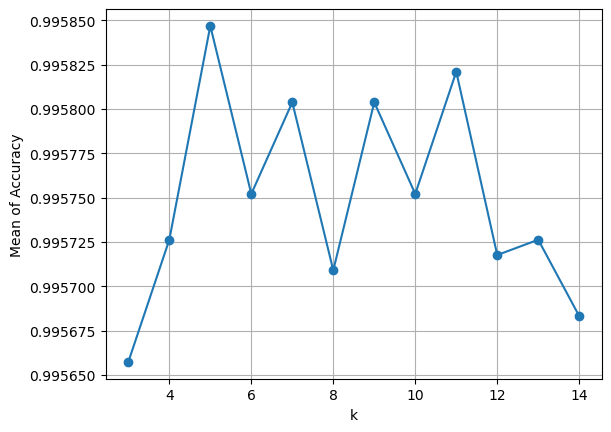

In [230]:
# plot k values versus mean of accuracy
plt.plot(neighbors, mean_k, 'o-') 

# display label on x-axis
plt.xlabel('k')

# display label on y-axis
plt.ylabel('Mean of Accuracy')

# display grid
plt.grid()

##### ~ from the above display, k = 5  having highest mean accuracy  

In [231]:
# creating an instance
knn = KNeighborsClassifier(n_neighbors=5) 
    
# fitting the model with the training data
knn_model = knn.fit(X_train, y_train) 
    
# calculate accuracy and display it
cv_knnresult = cross_val_score(knn_model, X, y, cv=kfold_validator)
cv_knnresult

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

array([0.99565734, 0.99576074, 0.99591584, 0.99622602, 0.99632942,
       0.99519206])

In [232]:
# display mean of accuracy
np.mean(cv_knnresult)

0.9958469041341398

**3) SVM**

##### 'linear' kernel

In [233]:
# calculate accuracy and display it
cv_svmlinresult = cross_val_score(svm_linmod, X, y, cv=kfold_validator)
cv_svmlinresult

array([0.99570904, 0.99586414, 0.99591584, 0.99622602, 0.99632942,
       0.99555395])

In [234]:
# display mean of accuracy
np.mean(cv_svmlinresult)

0.9959330679487842

##### 'rbf' kernel

In [235]:
# calculate accuracy and display it
cv_svmrbfresult = cross_val_score(svm_rbfmod, X, y, cv=kfold_validator)
cv_svmrbfresult

array([0.99581244, 0.99581244, 0.99586414, 0.99612263, 0.99638112,
       0.99555395])

In [236]:
# display mean of accuracy
np.mean(cv_svmrbfresult)

0.9959244515673199

##### 'polynomial' kernel

In [237]:
# calculate accuracy and display it
cv_svmpolresult = cross_val_score(svm_polmod, X, y, cv=kfold_validator)
cv_svmpolresult

array([0.99576074, 0.99570904, 0.99570904, 0.99622602, 0.99612263,
       0.99570904])

In [238]:
# display mean of accuracy
np.mean(cv_svmpolresult)

0.9958727532785331

## 2) Stratified Cross Validation

In [239]:
# specifying number of splits as 10
skfold_validator = StratifiedKFold(n_splits=6)

In [240]:
# using skfold_validator splitting X and y, checking which all index are given for training and testing
for train_index, test_index in skfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)

Training Index: [ 18983  19003  19314 ... 116055 116056 116057]
Testing Index: [    0     1     2 ... 19343 19344 19345]
Training Index: [     0      1      2 ... 116055 116056 116057]
Testing Index: [18983 19003 19314 ... 38685 38686 38687]
Training Index: [     0      1      2 ... 116055 116056 116057]
Testing Index: [38140 38676 38688 ... 58026 58027 58115]
Training Index: [     0      1      2 ... 116055 116056 116057]
Testing Index: [58028 58029 58030 ... 77369 77456 77499]
Training Index: [     0      1      2 ... 116055 116056 116057]
Testing Index: [77370 77371 77372 ... 97907 98106 98125]
Training Index: [    0     1     2 ... 97907 98106 98125]
Testing Index: [ 96705  96706  96707 ... 116055 116056 116057]


**1) logistic regression**

In [241]:
# calculate accuracy and display it
skcv_logresult = cross_val_score(log_model, X, y, cv=skfold_validator)
skcv_logresult

array([0.99601923, 0.99596753, 0.99581244, 0.99622602, 0.99596753,
       0.99607093])

In [242]:
# display mean of accuracy
np.mean(skcv_logresult)

0.9960106153819641

**2) kNN**

In [243]:
# create empty lists
metric_k = [] 
mean_k = []

# take values from 3 to 14 and store it in array format 
neighbors = np.arange(3,15)  

#  k refers to the number of neighbors that we're going to use to make our prediction 
for k in neighbors:
    
    # creating an instance
    knn = KNeighborsClassifier(n_neighbors=k) 
    
    # fitting the model with the training data
    knn_model = knn.fit(X_train, y_train) 
    
    # calculate accuracy 
    skcv_knnresult = cross_val_score(knn_model, X, y, cv=skfold_validator)
    
    # display k value
    print(f"k:{k} \n")
    
    # accuracy of each fold
    print(f"\n Accuracy of each fold : {skcv_knnresult}")
    
    # calculate mean of accuracy
    mean = np.mean(skcv_knnresult)
    print(f"\n Mean = {mean}")
    
    # appending mean of accuracy to the empty list
    mean_k.append(mean)
    
    # appending accuracy to the empty list
    metric_k.append(skcv_knnresult)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:3 


 Accuracy of each fold : [0.99565734 0.99570904 0.99524376 0.99576074 0.99586414 0.99570904]

 Mean = 0.995657343741922


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:4 


 Accuracy of each fold : [0.99565734 0.99555395 0.99550225 0.99596753 0.99601923 0.99565734]

 Mean = 0.9957262747936378


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:5 


 Accuracy of each fold : [0.99581244 0.99570904 0.99581244 0.99617433 0.99607093 0.99555395]

 Mean = 0.9958555205156042


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:6 


 Accuracy of each fold : [0.99560565 0.99555395 0.99576074 0.99596753 0.99601923 0.99565734]

 Mean = 0.9957607403194956


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:7 


 Accuracy of each fold : [0.99560565 0.99560565 0.99565734 0.99601923 0.99612263 0.99591584]

 Mean = 0.9958210549897465


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:8 


 Accuracy of each fold : [0.99565734 0.99550225 0.99560565 0.99586414 0.99591584 0.99565734]

 Mean = 0.9957004256492445


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:9 


 Accuracy of each fold : [0.99581244 0.99570904 0.99560565 0.99591584 0.99596753 0.99576074]

 Mean = 0.9957952058453531


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:10 


 Accuracy of each fold : [0.99576074 0.99570904 0.99555395 0.99581244 0.99591584 0.99570904]

 Mean = 0.9957435075565665


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:11 


 Accuracy of each fold : [0.99581244 0.99576074 0.99570904 0.99601923 0.99581244 0.99576074]

 Mean = 0.9958124386082821


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:12 


 Accuracy of each fold : [0.99581244 0.99570904 0.99560565 0.99576074 0.99581244 0.99560565]

 Mean = 0.9957176584121732


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:13 


 Accuracy of each fold : [0.99576074 0.99565734 0.99576074 0.99581244 0.99570904 0.99565734]

 Mean = 0.9957262747936376


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

k:14 


 Accuracy of each fold : [0.99581244 0.99570904 0.99555395 0.99570904 0.99570904 0.99560565]

 Mean = 0.9956831928863155


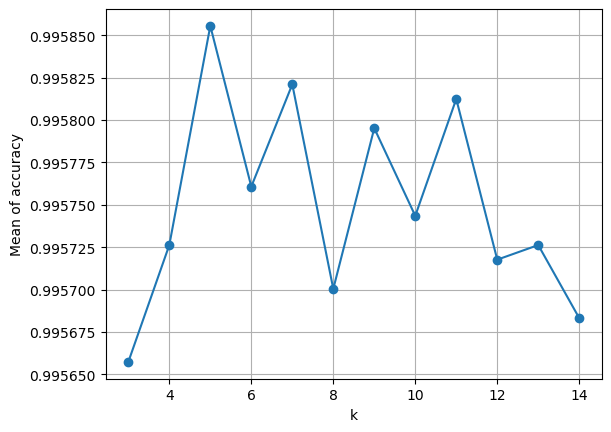

In [244]:
# plot k values versus mean of accuracy
plt.plot(neighbors, mean_k, 'o-')

# display label on the x-axis
plt.xlabel('k')

# display label on the y-axis
plt.ylabel('Mean of accuracy')

# display grid
plt.grid()

~ from the above display, k = 5 is having highest mean accuracy 

In [245]:
# creating an instance
knn = KNeighborsClassifier(n_neighbors=5) 
    
# fitting the model with the training data
knn_model = knn.fit(X_train, y_train) 
    
# calculate accuracy 
skcv_knnresult = cross_val_score(knn_model, X, y, cv=skfold_validator)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [246]:
# display mean of accuracy
np.mean(skcv_knnresult)

0.9958555205156042

**3) SVM**

##### 'linear' kernel

In [247]:
# calculate accuracy and display it
skcv_svmlinresult = cross_val_score(svm_linmod, X, y, cv=skfold_validator)
skcv_svmlinresult

array([0.99581244, 0.99565734, 0.99560565, 0.99617433, 0.99612263,
       0.99581244])

In [248]:
# display mean of accuracy
np.mean(skcv_svmlinresult)

0.9958641368970685

##### 'rbf' kernel

In [249]:
# calculate accuracy and display it
skcv_svmrbfresult = cross_val_score(svm_rbfmod, X, y, cv=skfold_validator)
skcv_svmrbfresult

array([0.99601923, 0.99581244, 0.99576074, 0.99607093, 0.99612263,
       0.99591584])

In [250]:
# display mean of accuracy
np.mean(skcv_svmrbfresult)

0.9959503007117131

##### 'polynomial' kernel

In [251]:
# calculate accuracy and display it
skcv_svmpolresult = cross_val_score(svm_polmod, X, y, cv=skfold_validator)
skcv_svmpolresult

array([0.99591584, 0.99565734, 0.99560565, 0.99617433, 0.99586414,
       0.99607093])

In [252]:
# display mean of accuracy
np.mean(skcv_svmpolresult)

0.9958813696599975

**ACCURACY OF DIFFERENT MODELS**
*********************************
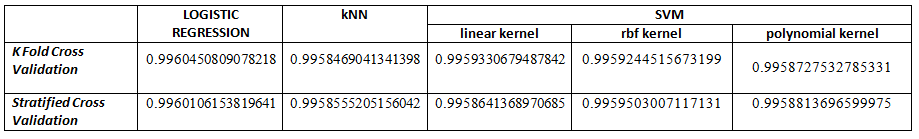